Text(0, 0.5, 'Amplitude')

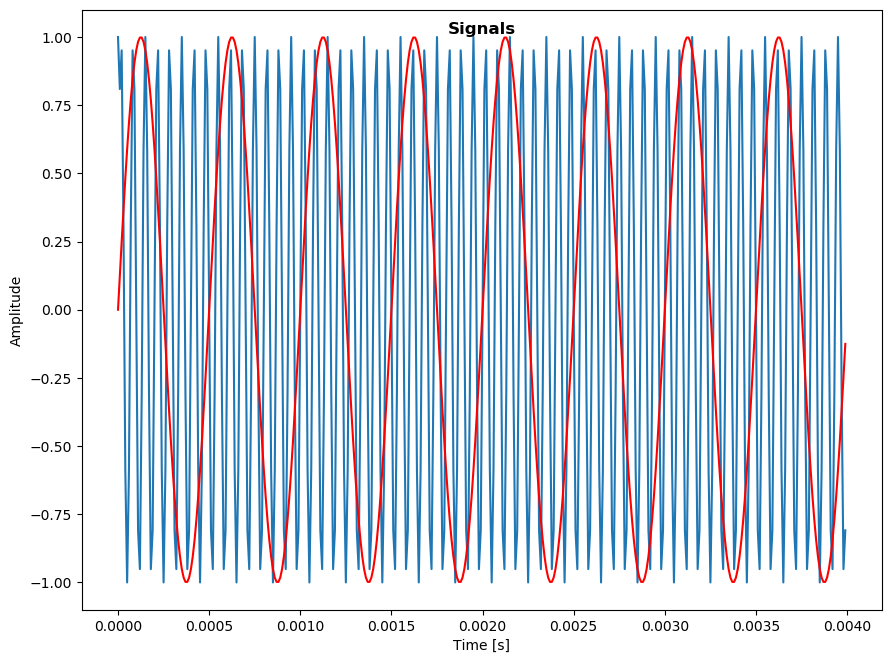

In [25]:
#Generation of mixer tones due to nonlinearity of diodes

#Note, the diode has the following current equation:
#  Id = Is(exp(Vd/(nVt))-1)
#The exponential term provides the nonlinearity.
#The exponential function can be approximated by the sum:
#  e^x = sum(x^n/n!) from 0 to infinity
#Given the n = 0 term is 1, this can be rewritten as
#  e^x - 1 = x + 1/2 * x^2 + 1/6 * x^3 + ...
#For a frequency mixer of two inputs, this leads to the following
#  Vo = (V1 + V2) + 1/2 * (V1 + V2)^2 + 1/6 * (V1 + V2)^3 + ...
#Now, note the following expansion of the squared term
#  1/2 * (V1 + V2)^2 = 1/2 * (V1^2 + 2*V1*V2 + V2^2)
#If sinusoids are inserted for V1 and V2, the center term becomes
#  V1*V2 = sinat*sinbt
#And by identity
#  sinat*sinbt = 1/2 * (cos(a-b) + cos(a+b))
#The result is a frequency translation
#Of course, the higher order terms of the exponential approximation
#also result in various frequency translations, though at lower power
#levels.  
#The point of this exercise is to model frequency mixing.


import math
import numpy
import scipy
import sys
from decimal import Decimal
from scipy import signal
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['figure.dpi'] = 100

#First lets create a couple of signals to use with our mixer
fsamp = 100000
samplength = 400
m = 0
signal = []
signal2 = []
while m < samplength:
    signal.append(math.sin(2*math.pi*15000/fsamp*m))
    signal2.append(math.sin(2*math.pi*2000/fsamp*m))
    #signal.append(0)
    m += 1
signalaxis = []
m = 0
while m < len(signal):
    signalaxis.append(m/fsamp)
    m += 1

signal[0] = 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(signalaxis,signal)
ax.plot(signalaxis,signal2,'r')

fig.suptitle('Signals', fontweight='bold') 
ax.set_xlabel('Time [s]') 
ax.set_ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

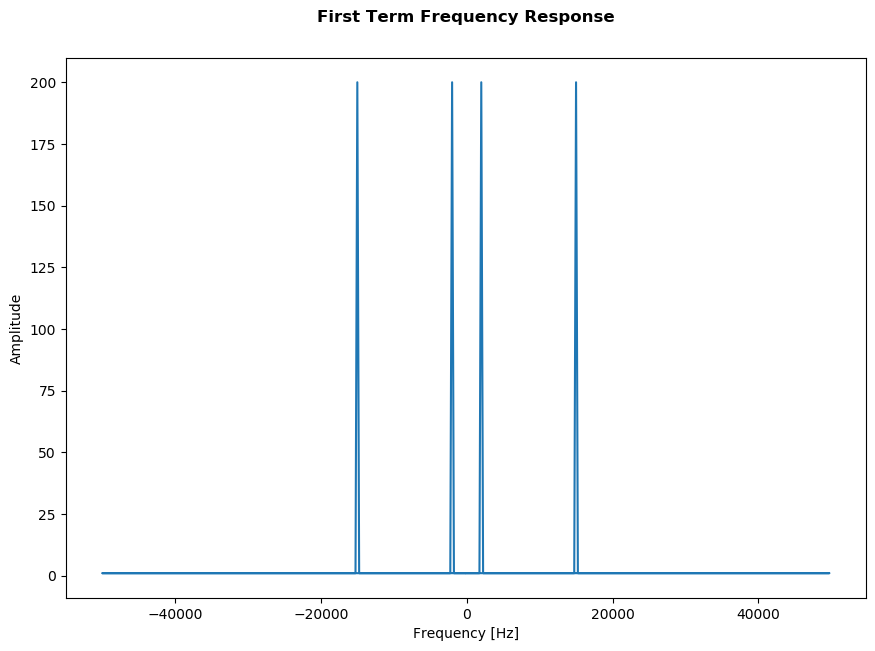

In [26]:
#Ok, now we have some signals to input to the mixer.  First, lets
#look at the first term of the mixer, (V1 + V2)

m = 0
signal3 = []
while m < samplength:
    signal3.append(signal[m]+signal2[m])
    m += 1

#Ok, now lets look at the frequency content of this term
#Frequency response of input signal

wavefreq = abs(scipy.fft(signal3))
freqaxis = []

freqaxis = list(numpy.fft.fftfreq(len(signal3), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,wavefreq)

fig.suptitle('First Term Frequency Response', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude') 

Text(0, 0.5, 'Amplitude')

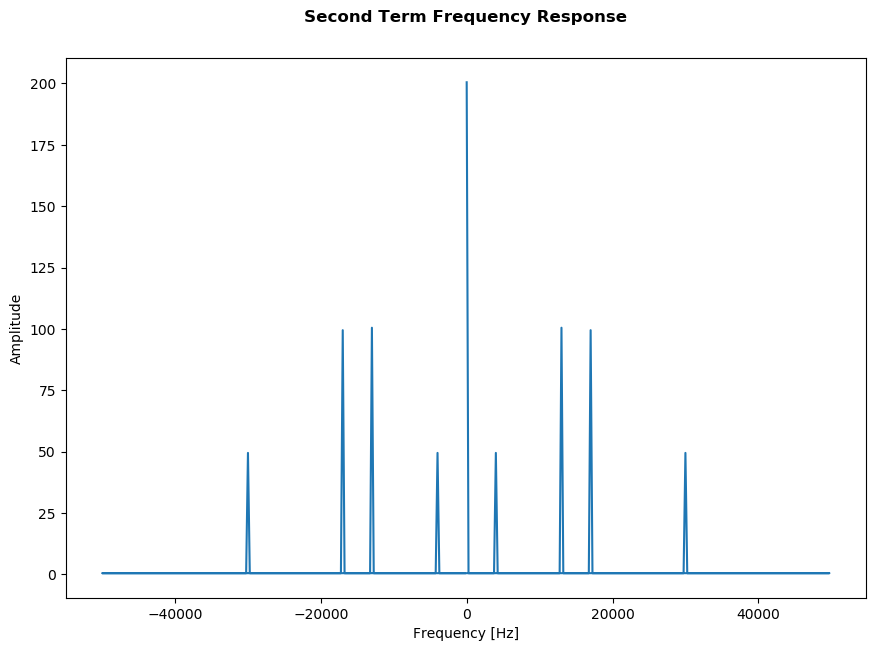

In [27]:
#Ok, now we can see our two frequencies, which both appear at their original locations.
#Now lets look at the second term, which is much more interesting

m = 0
signal4 = []
while m < samplength:
    signal4.append(0.5*(signal[m]+signal2[m])**2)
    m += 1

#Ok, now lets look at the frequency content of this term
#Frequency response of input signal

wavefreq = abs(scipy.fft(signal4))
freqaxis = []

freqaxis = list(numpy.fft.fftfreq(len(signal4), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,wavefreq)

fig.suptitle('Second Term Frequency Response', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude') 

Text(0, 0.5, 'Amplitude')

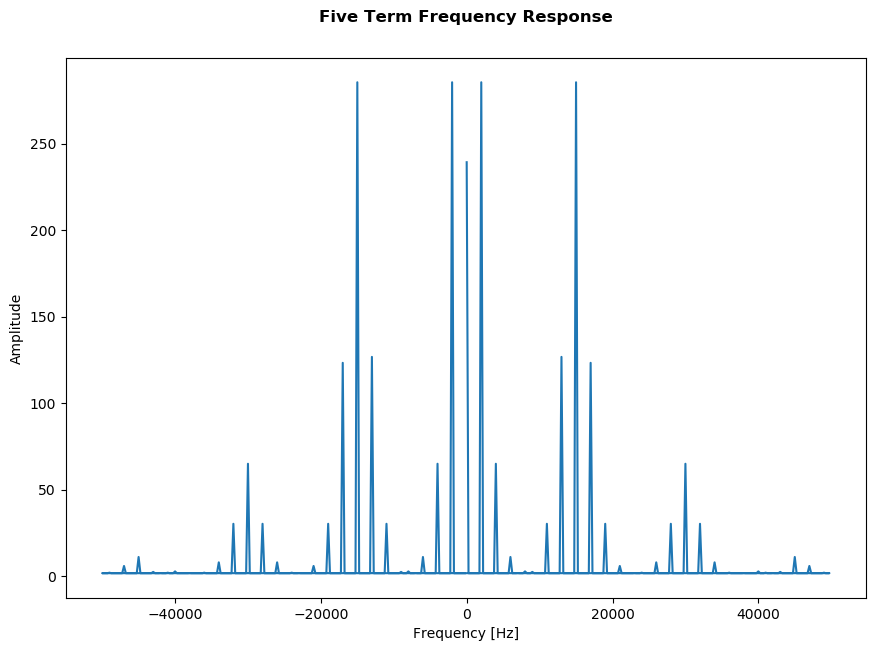

In [28]:
#Ok, now lets add the first five terms and see what out output looks like.

m = 0
signal5 = []
while m < samplength:
    signal5.append((signal[m]+signal2[m])+0.5*(signal[m]+signal2[m])**2+1/6*(signal[m]+signal2[m])**3+1/24*(signal[m]+signal2[m])**4+1/120*(signal[m]+signal2[m])**5)
    m += 1

#Ok, now lets look at the frequency content of this term
#Frequency response of input signal

wavefreq = abs(scipy.fft(signal5))
freqaxis = []

freqaxis = list(numpy.fft.fftfreq(len(signal5), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,wavefreq)

fig.suptitle('Five Term Frequency Response', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude') 

2.2250738585072014e-308


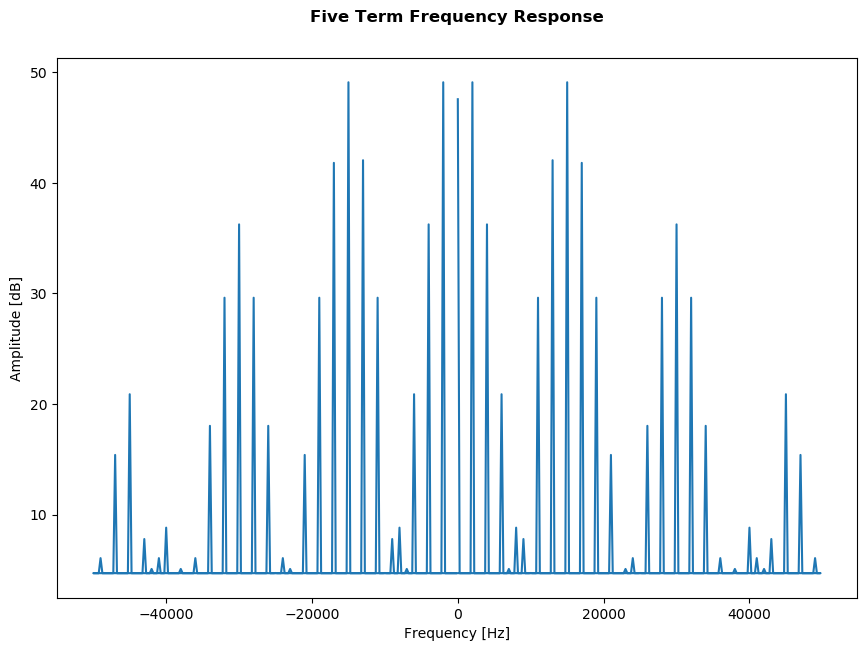

In [29]:
#Lets take a look at these guys in deciBels.

m = 0
signal6 = []
while m < len(wavefreq):
    signal6.append(20*math.log10(wavefreq[m]))
    m += 1

#Ok, now lets look at the frequency content of this term
#Frequency response of input signal

#wavefreq = abs(scipy.fft(signal6))
#freqaxis = []

#freqaxis = list(numpy.fft.fftfreq(len(signal6), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,signal6)

fig.suptitle('Five Term Frequency Response', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude [dB]') 

print(sys.float_info.min)

Text(0, 0.5, 'Amplitude [dB]')

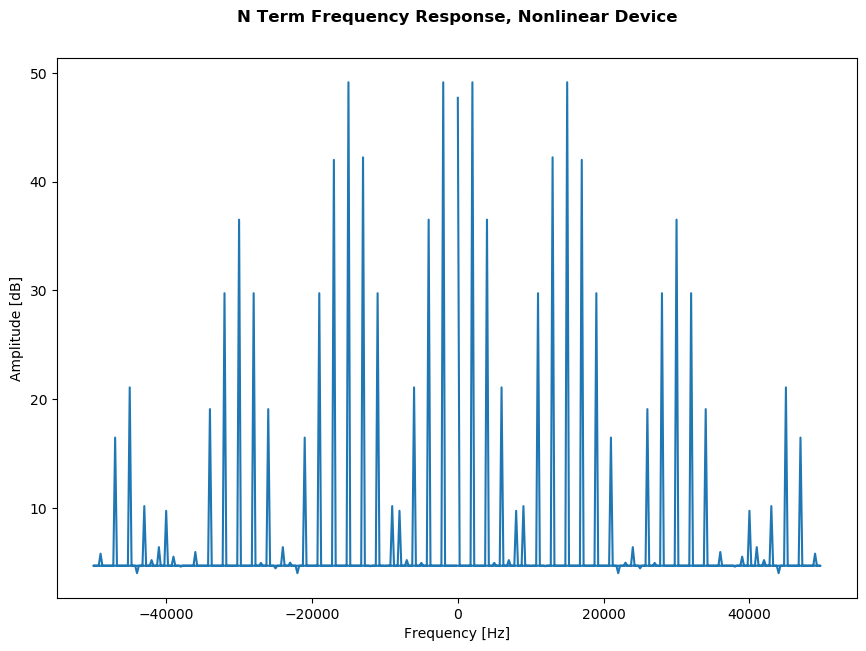

In [30]:
#Seeing this in deciBels makes it clear that even fifth order terms are only 35-40dB
#less in amplitude than the desired terms, meaning that an accurate mixer model probably
#needs to preserve terms of that order and possible larger order.  Also, there is a
#question of how to accurately determine conversion loss.

#Lets do a version where the number of terms of the approximation is set by a variable.

m = 0
nterms = 7
signal7 = []
while m < samplength:
    n = 1
    fac = 1
    tot = 0
    while n <= nterms:
        tot += (1/(n*fac)*(signal[m]+signal2[m])**n)
        fac = n*fac
        n += 1
    signal7.append(tot)
    m += 1

#Ok, now lets look at the frequency content of this term
#Frequency response of input signal

wavefreq = abs(scipy.fft(signal7))
freqaxis = []

m = 0
signal8 = []
while m < len(wavefreq):
    signal8.append(20*math.log10(wavefreq[m]))
    m += 1

freqaxis = list(numpy.fft.fftfreq(len(signal8), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,signal8)

fig.suptitle('N Term Frequency Response, Nonlinear Device', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude [dB]') 

Text(0, 0.5, 'Amplitude [dB]')

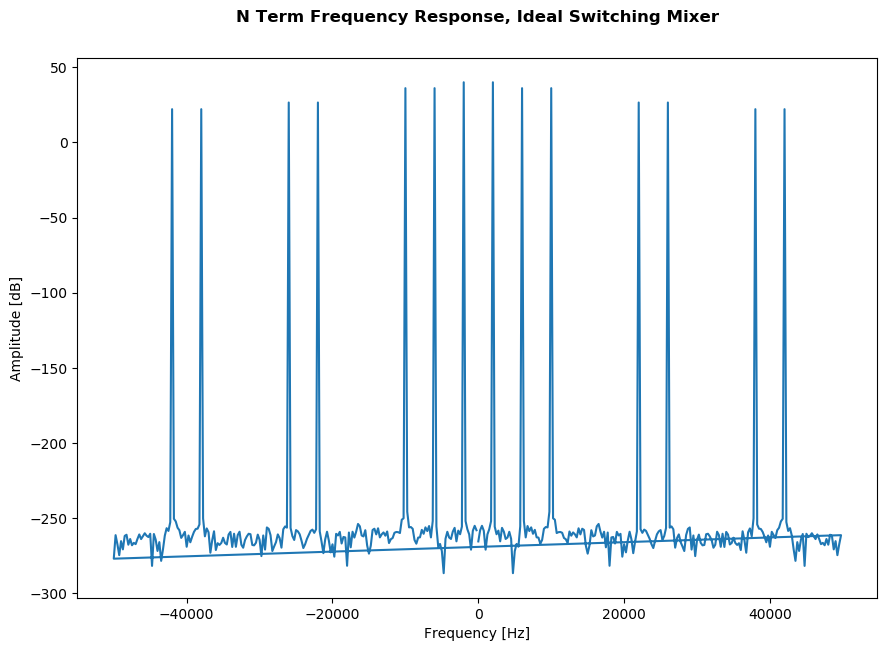

In [31]:
#Ok, so the generation of mixer products through nonlinear devices is understood at this point.  Now
#lets look at something different.  Let us model an ideal switching mixer, unbalanced, and see what kind
#of mixer products we get from that.

#The ideal switch mixer is essentially an LO in the form of a unit unipolar square wave multiplied by the
#RF signal.  This means that the odd harmonics present in a square wave combine with the input signal
#to produce the output.  It should eliminate the even harmonics and provide a somewhat cleaner IF spectrum.

#The Fourier representation of a square wave is:
#  0.5 + 2/pi * (sin(wLO*t) + 1/3 * sin(3*wLO*t) + 1/5 * sin(5*wLO*t) ...)

#Lets make the number of terms adjustable again like the previous cell
#This time we will denote our LO by frequency only, there is no need for
#an actual signal as our square wave series represents the LO waveform
#Let nterms represent the harmonic order, so nterms=5 means 5th harmonic

m = 0
nterms = 5
wLO = 2*math.pi*8000
signal9 = []
while m < samplength:
    n = 1
    tot = 0.5*(signal2[m])
    while n <= nterms:
        tot += (signal2[m])*(1/n)*math.sin(n*wLO*m/fsamp)*2/math.pi
        n += 2
    signal9.append(tot)
    m += 1
    
#fig.clear()
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,.9])
#ax.plot(signalaxis,signal9)

#Ok, now lets look at the frequency content of this term
#Frequency response of input signal

wavefreq = abs(scipy.fft(signal9))
freqaxis = []

m = 0
signal10 = []
while m < len(wavefreq):
    signal10.append(20*math.log10(wavefreq[m]))
    m += 1

freqaxis = list(numpy.fft.fftfreq(len(signal10), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,signal10)

fig.suptitle('N Term Frequency Response, Ideal Switching Mixer', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude [dB]') 

Text(0, 0.5, 'Amplitude [dB]')

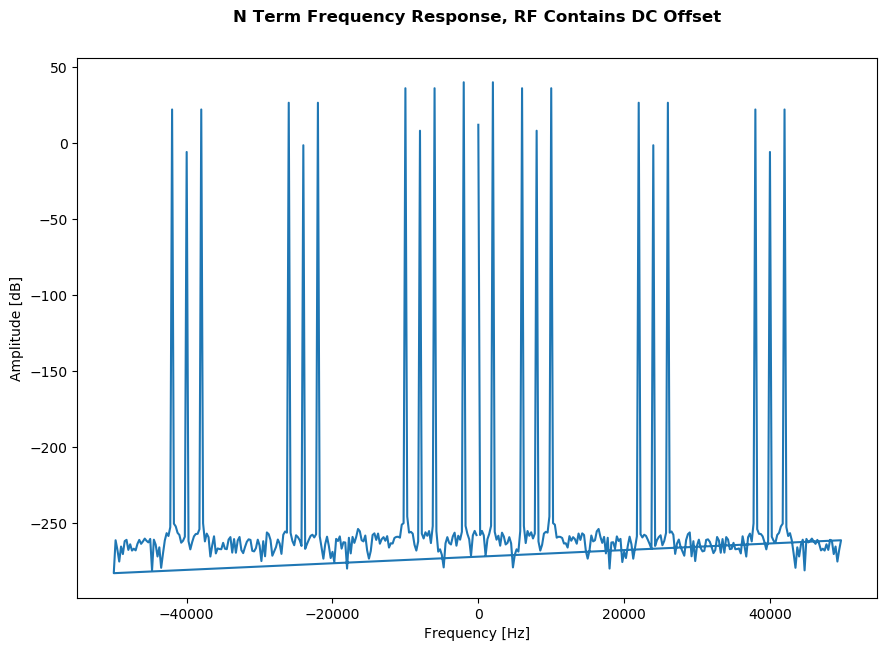

In [32]:
#Note that if there is any DC present on the RF input, there will be LO feedthrough and
#harmonic content, as this cell demonstrates.

m = 0
nterms = 5
wLO = 2*math.pi*8000
signal9 = []
while m < samplength:
    n = 1
    tot = 0.5*(signal2[m]+.02)
    while n <= nterms:
        tot += (signal2[m]+.02)*(1/n)*math.sin(n*wLO*m/fsamp)*2/math.pi
        n += 2
    signal9.append(tot)
    m += 1


#Ok, now lets look at the frequency content of this term
#Frequency response of input signal

wavefreq = abs(scipy.fft(signal9))
freqaxis = []

m = 0
signal10 = []
while m < len(wavefreq):
    signal10.append(20*math.log10(wavefreq[m]))
    m += 1

freqaxis = list(numpy.fft.fftfreq(len(signal10), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,signal10)

fig.suptitle('N Term Frequency Response, RF Contains DC Offset', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude [dB]') 

Text(0, 0.5, 'Amplitude [dB]')

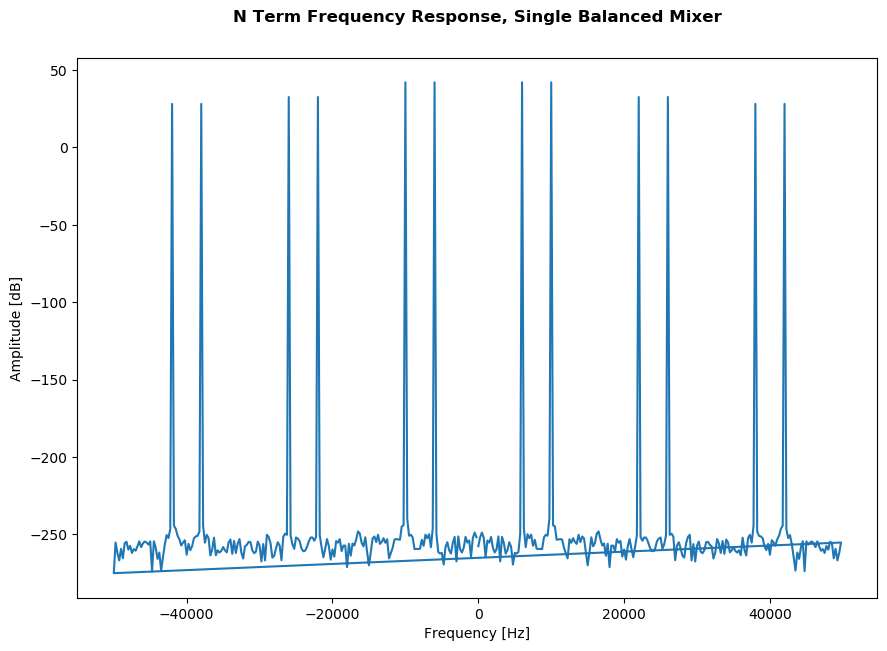

In [33]:
#Now, a single balanced mixer introduces bipolar switching and a differential output, which in turn
#eliminates the RF feedthrough.

#The new LO model is the result of the sum of a positive square wave and a 180 degree out of phase
#negative square wave, which together result in a bipolar unit square wave, or, in other words, a
#wave that switches between +1 and -1 at the LO frequency.

#The Fourier representation of a bipolar square wave is:
#  4/pi * (sin(wLO*t) + 1/3 * sin(3*wLO*t) + 1/5 * sin(5*wLO*t) ...)

#This should now remove the RF feedthrough from the switching mixer model

m = 0
nterms = 5
wLO = 2*math.pi*8000
signal11 = []
while m < samplength:
    n = 1
    tot = 0
    while n <= nterms:
        tot += (signal2[m])*(1/n)*math.sin(n*wLO*m/fsamp)*4/math.pi
        n += 2
    signal11.append(tot)
    m += 1

#Ok, now lets look at the frequency content of this term
#Frequency response of input signal

wavefreq = abs(scipy.fft(signal11))
freqaxis = []

m = 0
signal12 = []
while m < len(wavefreq):
    signal12.append(20*math.log10(wavefreq[m]))
    m += 1

freqaxis = list(numpy.fft.fftfreq(len(signal12), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,signal12)

fig.suptitle('N Term Frequency Response, Single Balanced Mixer', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude [dB]') 

Text(0, 0.5, 'Amplitude [dB]')

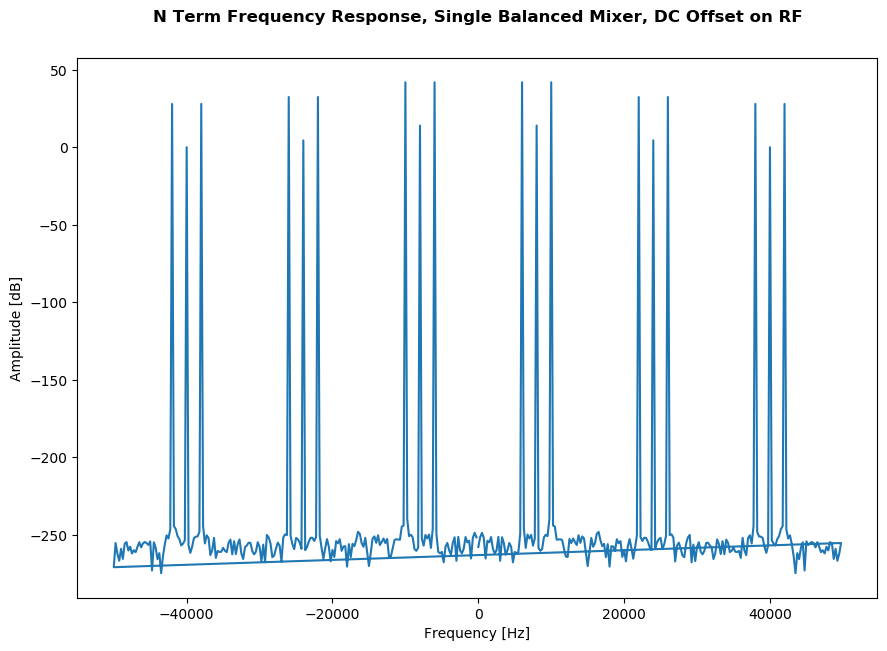

In [34]:
#The single balanced mixer eliminates the RF feedthrough, but DC offset on the RF input still results
#in LO feedthrough, as this cell shows.

m = 0
nterms = 5
wLO = 2*math.pi*8000
signal13 = []
while m < samplength:
    n = 1
    tot = 0
    while n <= nterms:
        tot += (signal2[m]+.02)*(1/n)*math.sin(n*wLO*m/fsamp)*4/math.pi
        n += 2
    signal13.append(tot)
    m += 1

#Ok, now lets look at the frequency content of this term
#Frequency response of input signal

wavefreq = abs(scipy.fft(signal13))
freqaxis = []

m = 0
signal14 = []
while m < len(wavefreq):
    signal14.append(20*math.log10(wavefreq[m]))
    m += 1

freqaxis = list(numpy.fft.fftfreq(len(signal14), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,signal14)

fig.suptitle('N Term Frequency Response, Single Balanced Mixer, DC Offset on RF', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude [dB]') 

In [ ]:
#Therefore, to remove the LO leakage we move to a double balanced mixer design.  The double
#balanced mixer removes the LO feedthrough, resulting in the spectrum from the single balanced
#mixer example above that did not include DC offset on the RF signal.